In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
from datetime import datetime

# Step 1: Load the Dataset
from kagglehub import dataset_download

# Download and load the dataset

dataset_file = 'C:/Users/adith/Documents/SCT/US_Accidents_March23.csv'


# Load the data into a pandas DataFrame
df = pd.read_csv(dataset_file)
print("Dataset Loaded. Shape:", df.shape)



Missing Values:
 End_Lat                  3329971
End_Lng                  3329971
Description                    5
Street                     10505
City                         242
Temperature(F)             25801
Wind_Chill(F)            1835388
Humidity(%)                35841
Pressure(in)                8443
Wind_Direction             38970
Wind_Speed(mph)           417167
Precipitation(in)        2053284
Sunrise_Sunset             20247
Civil_Twilight             20247
Nautical_Twilight          20247
Astronomical_Twilight      20247
dtype: int64


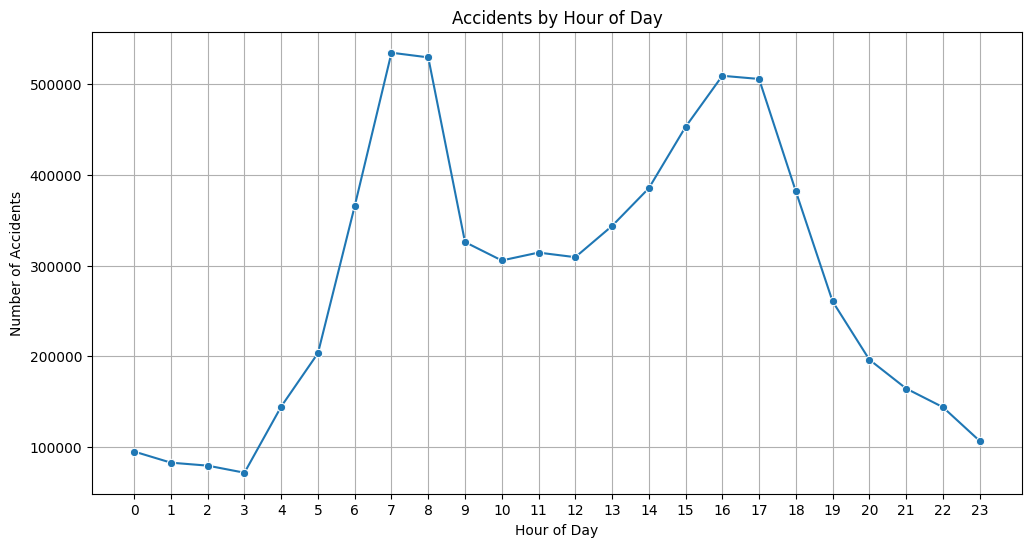

C:\Users\adith\AppData\Local\Temp\ipykernel_19404\3182922332.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette='coolwarm')


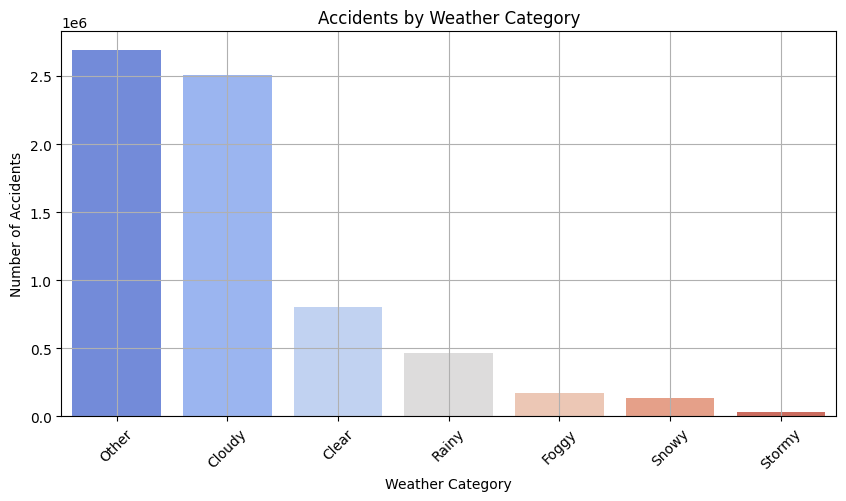

C:\Users\adith\AppData\Local\Temp\ipykernel_19404\3182922332.py:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')


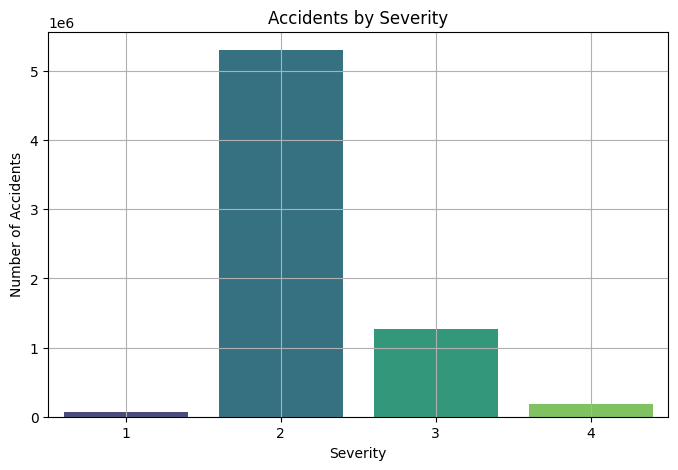

Heatmap saved as 'accident_hotspots.html'. Open it in a browser to view.

Analysis Complete. Key findings summarized below:
- Peak accident hours identified with line plot.
- Weather conditions categorized and analyzed for accident frequency.
- Accident severity distribution visualized with bar chart.
- Heatmap generated for geographic hotspots.


In [8]:

missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values[missing_values > 0])

df.dropna(subset=["Start_Time", "Weather_Condition", "Visibility(mi)", "Severity"], inplace=True)


df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.dropna(subset=["Start_Time"], inplace=True)  

df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()


weather_conditions = {
    'Clear': 'Clear',
    'Rain': 'Rainy',
    'Snow': 'Snowy',
    'Cloud': 'Cloudy',
    'Fog': 'Foggy',
    'Haze': 'Foggy',
    'Thunder': 'Stormy'
}
df['Weather_Category'] = df['Weather_Condition'].apply(
    lambda x: next((v for k, v in weather_conditions.items() if k in str(x)), 'Other')
)


hourly_accidents = df.groupby('Hour').size()


weather_accidents = df.groupby('Weather_Category').size().sort_values(ascending=False)


severity_counts = df['Severity'].value_counts().sort_index()


hotspot_data = df[['Start_Lat', 'Start_Lng']].dropna()


import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap


plt.figure(figsize=(12, 6))
sns.lineplot(x=hourly_accidents.index, y=hourly_accidents.values, marker='o')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(0, 24))
plt.grid()
plt.show()


plt.figure(figsize=(10, 5))
sns.barplot(x=weather_accidents.index, y=weather_accidents.values, palette='coolwarm')
plt.title('Accidents by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid()
plt.show()


plt.figure(figsize=(8, 5))
sns.barplot(x=severity_counts.index, y=severity_counts.values, palette='viridis')
plt.title('Accidents by Severity')
plt.xlabel('Severity')
plt.ylabel('Number of Accidents')
plt.grid()
plt.show()


import folium

map_center = [hotspot_data['Start_Lat'].mean(), hotspot_data['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)

heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in hotspot_data.iterrows()]
HeatMap(heat_data).add_to(accident_map)


map_output = "accident_hotspots.html"
accident_map.save(map_output)
print(f"Heatmap saved as '{map_output}'. Open it in a browser to view.")



In [ ]:
from folium import Map
from folium.plugins import HeatMap
from folium import Map


map_center = [hotspot_data['Start_Lat'].mean(), hotspot_data['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=6)
HeatMap(heat_data).add_to(accident_map)


accident_map
